In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandasql as ps
import datetime as dt

In [2]:
df1 = pd.read_csv("online.csv")

In [3]:
# def get_month(x):
#     return dt.datetime(x.year, x.month,1)
# df1['InvoiceMonth']=df1['InvoiceDate'].apply(get_month)

In [4]:
df1['InvoiceDate'] = df1['InvoiceDate'].astype('datetime64[ns]')

In [5]:
df1['InvoiceMonth']=df1['InvoiceDate'].values.astype('datetime64[M]')

In [6]:
df1

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,416792,572558.0,22745,POPPY'S PLAYHOUSE BEDROOM,6.0,2011-10-25 08:26:00,2.10,14286.0,United Kingdom,2011-10-01
1,482904,577485.0,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1.0,2011-11-20 11:56:00,1.45,16360.0,United Kingdom,2011-11-01
2,263743,560034.0,23299,FOOD COVER WITH BEADS SET 2,6.0,2011-07-14 13:35:00,3.75,13933.0,United Kingdom,2011-07-01
3,495549,578307.0,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1.0,2011-11-23 15:53:00,2.10,17290.0,United Kingdom,2011-11-01
4,204384,554656.0,21756,BATH BUILDING BLOCK WORD,3.0,2011-05-25 13:36:00,5.95,17663.0,United Kingdom,2011-05-01
...,...,...,...,...,...,...,...,...,...,...
70859,448575,575063.0,22804,PINK HANGING HEART T-LIGHT HOLDER,1.0,2011-11-08 12:32:00,2.95,16764.0,United Kingdom,2011-11-01
70860,19970,537963.0,21733,RED HANGING HEART T-LIGHT HOLDER,12.0,2010-12-09 11:30:00,2.95,13369.0,United Kingdom,2010-12-01
70861,264154,560089.0,23238,SET OF 4 KNICK KNACK TINS LONDON,1.0,2011-07-14 16:45:00,4.15,12748.0,United Kingdom,2011-07-01
70862,199822,554103.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.0,2011-05-22 13:51:00,2.95,15555.0,United Kingdom,2011-05-01


In [7]:
grouping=df1.groupby('CustomerID')['InvoiceMonth']
df1['CohortMonth']=grouping.transform('min')

In [8]:
#df1['Invoice_just_date'] = df1['Invoice_just_date'].astype('datetime64[ns]')
df1['CohortMonth'] = df1['CohortMonth'].astype('datetime64[ns]')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70864 entries, 0 to 70863
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         70864 non-null  object        
 1   InvoiceNo     70196 non-null  float64       
 2   StockCode     70196 non-null  object        
 3   Description   70196 non-null  object        
 4   Quantity      70196 non-null  float64       
 5   InvoiceDate   70196 non-null  datetime64[ns]
 6   UnitPrice     70196 non-null  float64       
 7   CustomerID    70196 non-null  float64       
 8   Country       70196 non-null  object        
 9   InvoiceMonth  70196 non-null  datetime64[ns]
 10  CohortMonth   70196 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(4), object(4)
memory usage: 5.9+ MB


In [10]:
#We will extract integer values of the year,month,day from the datetime object

In [11]:
def get_date_int(df,column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year,month,day

In [12]:
#We will calculate the number of months betweeb any transaction and the first transaction for each customer. We calculate the diffrence in years and months between them.
#We will convert the total differences to months by multiplying the year difference by 12 and adding them together. You can see there is a +1 in the end, so the first month
#is marked as 1 for easier interpretation.

In [13]:
invoice_year,invoice_month,_=get_date_int(df1,'InvoiceMonth')
cohort_year,cohort_month,_=get_date_int(df1,'CohortMonth')
years_diff=invoice_year-cohort_year
months_diff=invoice_month-cohort_month
df1['CohortIndex']=years_diff*12+months_diff+1

In [14]:
df1

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,416792,572558.0,22745,POPPY'S PLAYHOUSE BEDROOM,6.0,2011-10-25 08:26:00,2.10,14286.0,United Kingdom,2011-10-01,2011-04-01,7.0
1,482904,577485.0,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1.0,2011-11-20 11:56:00,1.45,16360.0,United Kingdom,2011-11-01,2011-09-01,3.0
2,263743,560034.0,23299,FOOD COVER WITH BEADS SET 2,6.0,2011-07-14 13:35:00,3.75,13933.0,United Kingdom,2011-07-01,2011-07-01,1.0
3,495549,578307.0,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1.0,2011-11-23 15:53:00,2.10,17290.0,United Kingdom,2011-11-01,2011-11-01,1.0
4,204384,554656.0,21756,BATH BUILDING BLOCK WORD,3.0,2011-05-25 13:36:00,5.95,17663.0,United Kingdom,2011-05-01,2011-02-01,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
70859,448575,575063.0,22804,PINK HANGING HEART T-LIGHT HOLDER,1.0,2011-11-08 12:32:00,2.95,16764.0,United Kingdom,2011-11-01,2011-07-01,5.0
70860,19970,537963.0,21733,RED HANGING HEART T-LIGHT HOLDER,12.0,2010-12-09 11:30:00,2.95,13369.0,United Kingdom,2010-12-01,2010-12-01,1.0
70861,264154,560089.0,23238,SET OF 4 KNICK KNACK TINS LONDON,1.0,2011-07-14 16:45:00,4.15,12748.0,United Kingdom,2011-07-01,2010-12-01,8.0
70862,199822,554103.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.0,2011-05-22 13:51:00,2.95,15555.0,United Kingdom,2011-05-01,2010-12-01,6.0


In [15]:
grouping2=df1.groupby(['CohortMonth','CohortIndex'])
cohort_data=grouping2['CustomerID'].apply(pd.Series.nunique)
cohort_data=cohort_data.reset_index()

In [16]:
cohort_counts=cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')

In [17]:
#Number of monthly active customers in each cohort.

In [18]:
cohort_counts

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,712.0,246.0,221.0,248.0,243.0,285.0,247.0,235.0,240.0,264.0,252.0,348.0,171.0
2011-01-01,332.0,69.0,82.0,80.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,82.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,390.0,64.0,99.0,76.0,83.0,67.0,99.0,86.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,248.0,40.0,43.0,36.0,52.0,58.0,61.0,21.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,172.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Store the first column as cohort_sizes
cohort_sizes=cohort_counts.iloc[:,0]

In [20]:
#Divide all values in the cohotrt counts table by cohort_sizes
retention=cohort_counts.divide(cohort_sizes,axis=0)

In [21]:
#Make it look like a percentage
retention_rounded=retention.round(3)*100

In [22]:
#Retention Rate!!!

In [23]:
retention_rounded

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,34.6,31.0,34.8,34.1,40.0,34.7,33.0,33.7,37.1,35.4,48.9,24.0
2011-01-01,100.0,20.8,24.7,24.1,33.1,27.1,24.7,25.9,31.3,30.7,37.3,13.6,NaN
2011-02-01,100.0,18.4,18.0,25.9,26.9,23.4,25.3,26.3,27.2,30.1,8.9,NaN,NaN
2011-03-01,100.0,16.4,25.4,19.5,21.3,17.2,25.4,22.1,27.4,9.7,NaN,NaN,NaN
2011-04-01,100.0,19.2,20.4,19.2,18.4,20.4,22.0,23.1,6.7,NaN,NaN,NaN,NaN
2011-05-01,100.0,16.1,17.3,14.5,21.0,23.4,24.6,8.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,15.9,12.6,19.8,23.7,30.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,16.3,18.0,22.1,25.6,9.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,21.6,20.1,25.2,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
retention

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.345506,0.310393,0.348315,0.341292,0.400281,0.346910,0.330056,0.337079,0.370787,0.353933,0.488764,0.240169
2011-01-01,1.0,0.207831,0.246988,0.240964,0.331325,0.271084,0.246988,0.259036,0.313253,0.307229,0.373494,0.135542,NaN
2011-02-01,1.0,0.183544,0.180380,0.259494,0.268987,0.234177,0.253165,0.262658,0.272152,0.300633,0.088608,NaN,NaN
2011-03-01,1.0,0.164103,0.253846,0.194872,0.212821,0.171795,0.253846,0.220513,0.274359,0.097436,NaN,NaN,NaN
2011-04-01,1.0,0.192157,0.203922,0.192157,0.184314,0.203922,0.219608,0.231373,0.066667,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.161290,0.173387,0.145161,0.209677,0.233871,0.245968,0.084677,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.159420,0.125604,0.198068,0.236715,0.299517,0.091787,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.162791,0.180233,0.220930,0.255814,0.098837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.215827,0.201439,0.251799,0.100719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Retention rates'}, xlabel='CohortIndex', ylabel='CohortMonth'>

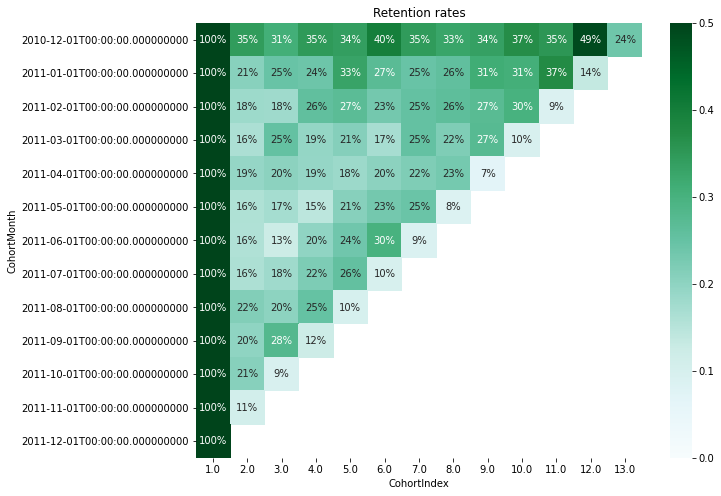

In [25]:
plt.figure(figsize=(10,8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot=True, fmt='.0%',vmin=0.0,vmax=0.5,cmap='BuGn')

In [26]:
cohort_data=grouping2['Quantity'].mean().reset_index()


In [27]:
average_quantity=cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')
average_quantity.round(1)

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.1,12.3,12.2,13.2,13.7,11.3,10.6,12.8,13.2,13.0,14.5,10.9,13.8
2011-01-01,10.9,10.7,10.0,10.2,14.4,13.2,17.5,16.4,18.7,10.2,10.6,13.2,NaN
2011-02-01,12.1,14.3,10.5,11.5,17.5,12.1,17.3,13.2,13.4,15.9,14.2,NaN,NaN
2011-03-01,9.6,14.4,13.0,10.1,16.2,12.6,11.6,11.5,9.0,9.7,NaN,NaN,NaN
2011-04-01,9.8,11.1,12.4,11.5,11.4,7.7,9.2,9.3,6.6,NaN,NaN,NaN,NaN
2011-05-01,14.2,9.7,15.1,11.4,11.9,8.5,9.7,7.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.6,16.0,18.3,11.2,12.5,7.2,9.7,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,10.9,16.5,5.6,9.9,6.3,6.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.5,7.4,5.4,5.6,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# def get_date_int(df, column):
#     year = df[column].dt.year
#     month = df[column].dt.month
#     day = df[column].dt.day
#     return year, month, day

In [29]:
# # Get the integers for date parts from the InvoiceDaycolumn
# invoice_year, invoice_month, invoice_day = get_date_int(df1, 'InvoiceMonth')

# # Get the integers for date parts from the CohortDay column
# cohort_year, cohort_month, cohort_day = get_date_int(df1, 'CohortMonth')

In [30]:
df1

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,416792,572558.0,22745,POPPY'S PLAYHOUSE BEDROOM,6.0,2011-10-25 08:26:00,2.10,14286.0,United Kingdom,2011-10-01,2011-04-01,7.0
1,482904,577485.0,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1.0,2011-11-20 11:56:00,1.45,16360.0,United Kingdom,2011-11-01,2011-09-01,3.0
2,263743,560034.0,23299,FOOD COVER WITH BEADS SET 2,6.0,2011-07-14 13:35:00,3.75,13933.0,United Kingdom,2011-07-01,2011-07-01,1.0
3,495549,578307.0,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1.0,2011-11-23 15:53:00,2.10,17290.0,United Kingdom,2011-11-01,2011-11-01,1.0
4,204384,554656.0,21756,BATH BUILDING BLOCK WORD,3.0,2011-05-25 13:36:00,5.95,17663.0,United Kingdom,2011-05-01,2011-02-01,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
70859,448575,575063.0,22804,PINK HANGING HEART T-LIGHT HOLDER,1.0,2011-11-08 12:32:00,2.95,16764.0,United Kingdom,2011-11-01,2011-07-01,5.0
70860,19970,537963.0,21733,RED HANGING HEART T-LIGHT HOLDER,12.0,2010-12-09 11:30:00,2.95,13369.0,United Kingdom,2010-12-01,2010-12-01,1.0
70861,264154,560089.0,23238,SET OF 4 KNICK KNACK TINS LONDON,1.0,2011-07-14 16:45:00,4.15,12748.0,United Kingdom,2011-07-01,2010-12-01,8.0
70862,199822,554103.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.0,2011-05-22 13:51:00,2.95,15555.0,United Kingdom,2011-05-01,2010-12-01,6.0


## Recency Frequency Monetary Segmentation

### I am going to calculate three customer behavior metrics
1. Recency - which measures how recent was each customer's last purchase
2. Frequency - which measures how many purchases the customer has done in the last 12 months
3. MonetaryValue - measures how much has the customer spent in the last 12 months
 - We will use these values to assign customers to RFM segments

##### Once we have calculated these numbers, the next step is to group them into some sort of categorization such as high, medium and low. There are multiple ways to do that. We can break customers into groups of equal size based on percentile values of each metric We can assign either high or low value to each metric based on a 80/20% Pareto split Or we can use existing knowledge from previous business insights about certain threshold values for each metric In the next section you will learn how to assign a percentile to a metric, and then create a label to be used for segmentation.

In [31]:
# # Create a spend quartile with 4 groups - a range between 1 and 5
# spend_quartile = pd.qcut(data['Spend'], q=4, labels=range(1,5))

# # Assign the quartile values to the Spend_Quartile column in data
# data['Spend_Quartile'] = spend_quartile

# # Print data with sorted Spend values
# print(data.sort_values('Spend'))

In [32]:
# # Store labels from 4 to 1 in a decreasing order
# r_labels = list(range(4, 0, -1))

# # Create a spend quartile with 4 groups and pass the previously created labels 
# recency_quartiles = pd.qcut(data['Recency_Days'], q=4, labels=r_labels)

# # Assign the quartile values to the Recency_Quartile column in `data`
# data['Recency_Quartile'] = recency_quartiles 

# # Print `data` with sorted Recency_Days values
# print(data.sort_values('Recency_Days'))

In [33]:
print('Min:{};Max:{}'.format(min(df1.InvoiceDate),max(df1.InvoiceDate)))

Min:2010-12-01 08:26:00;Max:2011-12-09 12:49:00


In [34]:
#The data covers a full year, in the real world we would work with data until yesterday.We add a day in the last day in the data

In [35]:
snapshot_date=max(df1.InvoiceDate)+dt.timedelta(days=1)

In [36]:
df1['TotalSum']=df1.Quantity*df1.UnitPrice

In [37]:
#Aggregate data on customer_level and Calculate Recency, Frequency and Monetary value for each customer 
datamart = df1.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

In [38]:
df1

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSum
0,416792,572558.0,22745,POPPY'S PLAYHOUSE BEDROOM,6.0,2011-10-25 08:26:00,2.10,14286.0,United Kingdom,2011-10-01,2011-04-01,7.0,12.60
1,482904,577485.0,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1.0,2011-11-20 11:56:00,1.45,16360.0,United Kingdom,2011-11-01,2011-09-01,3.0,1.45
2,263743,560034.0,23299,FOOD COVER WITH BEADS SET 2,6.0,2011-07-14 13:35:00,3.75,13933.0,United Kingdom,2011-07-01,2011-07-01,1.0,22.50
3,495549,578307.0,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1.0,2011-11-23 15:53:00,2.10,17290.0,United Kingdom,2011-11-01,2011-11-01,1.0,2.10
4,204384,554656.0,21756,BATH BUILDING BLOCK WORD,3.0,2011-05-25 13:36:00,5.95,17663.0,United Kingdom,2011-05-01,2011-02-01,4.0,17.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70859,448575,575063.0,22804,PINK HANGING HEART T-LIGHT HOLDER,1.0,2011-11-08 12:32:00,2.95,16764.0,United Kingdom,2011-11-01,2011-07-01,5.0,2.95
70860,19970,537963.0,21733,RED HANGING HEART T-LIGHT HOLDER,12.0,2010-12-09 11:30:00,2.95,13369.0,United Kingdom,2010-12-01,2010-12-01,1.0,35.40
70861,264154,560089.0,23238,SET OF 4 KNICK KNACK TINS LONDON,1.0,2011-07-14 16:45:00,4.15,12748.0,United Kingdom,2011-07-01,2010-12-01,8.0,4.15
70862,199822,554103.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.0,2011-05-22 13:51:00,2.95,15555.0,United Kingdom,2011-05-01,2010-12-01,6.0,5.90


In [39]:
# Rename the columns 
datamart.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

In [40]:
datamart.head(3)

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747.0,2,27,992.82
12748.0,1,960,7484.05
12749.0,4,37,813.45


6. Calculate percentiles with Python
We will now assign a quartile value to each of these customers. First, we will use the qcut() function on the Spend variable, and define that we want 4 groups of equal sizes - called quartiles. We will also pass a range() function to the labels argument so our groups have integer names, with highest value quartile labeled as 4, and lowest as 1. Next, we add a column to our dataframe. And then we print it after sorting by the quartile value.

7. Assigning labels
When assigning labels we want them to represent what is the top and the bottom percentile based on sorted values, but the highest value of the metric is not always the best. For example, the recency metric which calculates days since the last purchase, is better when it's low rather than high. For this example, we have created a sample dataset with 8 CustomerIDs and their Recency in days.

8. Assigning labels
Let's create a list of labels - only this time the values are reversed as lower recency is rated higher. We will use the qcut() function on the Recency variable, and define that we want 4 groups of equal size. We will pass the list of labels we created above. Next, we add a column to our dataset. And then print it after sorting by the recency_days value.

9. Assigning labels
As you can see, the lower the recency, the higher the quartile value. When assigning labels, you should always think whether higher or lower values should be of a higher rank.

10. Custom labels
We can also create custom named labels. First, we create named labels as strings in a descending order. We use descending order because we are ranking Recency metric. Then we run everything like previously and get a new Recency label based on the previously defined values.

11. Custom labels
Although this is a small sample, it does show the main concepts of how to use percentiles to group customers based on their usage behavior.

12. Let's practice with percentiles!
Now, you will practice with assigning percentiles to different values, and create custom labels to them.

In [41]:
# Create labels for Recency and Frequency
r_labels = range(3, 0, -1); f_labels = range(1, 4)

# Assign these labels to three equal percentile groups 
r_groups = pd.qcut(datamart['Recency'], q=3, labels=r_labels)

# Assign these labels to three equal percentile groups 
f_groups = pd.qcut(datamart['Frequency'], q=3, labels=f_labels)

# Create new columns R and F
datamart = datamart.assign(R=r_groups.values, F=f_groups.values)

In [42]:
# Create labels for MonetaryValue 
m_labels = range(1, 4)

# Assign these labels to three equal percentile groups
m_groups = pd.qcut(datamart['MonetaryValue'], q=3, labels=m_labels)

# Create new column M
datamart = datamart.assign(M=m_groups.values)

# Calculate RFM_Score
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)
print(datamart['RFM_Score'].head())

CustomerID
12747.0    9
12748.0    9
12749.0    9
12820.0    9
12822.0    6
Name: RFM_Score, dtype: int64


In [43]:
datamart

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
CustomerID,,,,,,,
12747.0,2,27,992.82,3,3,3,9
12748.0,1,960,7484.05,3,3,3,9
12749.0,4,37,813.45,3,3,3,9
12820.0,3,17,268.02,3,3,3,9
12822.0,71,9,146.15,2,2,2,6
...,...,...,...,...,...,...,...
18280.0,278,2,38.70,1,1,1,3
18281.0,181,2,31.80,1,1,1,3
18282.0,8,2,30.70,3,1,1,5


In [44]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Top'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9)):
        return 'Middle'
    else:
        return 'Low'

# Create a new variable RFM_Level
datamart['RFM_Level'] = datamart.apply(rfm_level, axis=1)

# Print the header with the top 5 rows to the console.
print(datamart.head())

            Recency  Frequency  MonetaryValue  R  F  M  RFM_Score RFM_Level
CustomerID                                                                 
12747.0           2         27         992.82  3  3  3          9       Top
12748.0           1        960        7484.05  3  3  3          9       Top
12749.0           4         37         813.45  3  3  3          9       Top
12820.0           3         17         268.02  3  3  3          9       Top
12822.0          71          9         146.15  2  2  2          6    Middle


In [45]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = datamart.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
  
  	# Return the size of each segment
    'MonetaryValue': ['mean', 'count']
}).round(1)

# Print the aggregated dataset
rfm_level_agg

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Level                                      
Low         186.2       3.2          50.8  1052
Middle       70.7      14.9         283.6  2071
Top          10.3      62.4        1321.5   575

###### K-means clustering
2. Advantages of k-means clustering
We are going to use K-means clustering because of its several advantages. First, it is one of the most popular unsupervised learning method, and has been researched a lot, so you can find answers and tips on almost any question about it. Also, it is a pretty fast algorithm compared to slower ones that do not work very well with large datasets - especially not on your local machine. And finally, it does its job well, as long as your assumptions about the data are correct. We will review them in this lesson, and then learn how to pre-process your data to get the most out of k-means.

3. Key k-means assumptions
Although this is not an exhaustive list, these are the make-it-or-break-it assumptions that are absolutely critical to address before the clustering. The first assumption is that all variables have symmetrical distributions. By definition, this means the distribution is not skewed. We will see examples of both skewed and non skewed distributions in the next slide. The second assumption is that all variables have the same average values. This is key to ensuring that each metric gets an equal weight in the k-means calculation. You will learn how to get every variable to the same mean. And finally, we will have to scale the variance of each variable to the same levels. Same as with the averages, it helps the algorithm to converge and ensures equal importance is assigned to each variable.

4. Skewed variables
Let's take a look at how to identify skewed variables. The best way to identify them is by looking at each variable's distribution - the skewness will show up as a curve with a tail. For example this is a left-skewed distribution with a tail on the left. And this here is a right-skewed distribution. While there are mathematical ways to identify skewness, the visual analysis is somewhat more accessible. It allows you to not only identify skewness, but also understand the distribution and the spread of data.

5. Skewed variables
Skewness is best managed by applying a logarithmic transformation to each of the skewed variables. Its distribution then becomes more symmetrical. One thing to point out though - log transformation works only on positive values. Fortunately, this is mostly the case with customer behavior or purchasing patterns. You will learn about alternative options to manage variables with negative values in the next lesson.

6. Variables on the same scale
Finally, K-means assumes each variable has equal average value, and equal variance. We will use recency, frequency, and monetary values for the clustering and in the next lesson you will see that they don't meet any of the criteria. We will then have to go through necessary pre-processing steps before anything else. By calling the "describe" function on a dataframe you will get a list of key statistics. Here we see that both the average values as well as standard deviations are different between the three variables.

In [46]:
#log trandformation works for piositive values

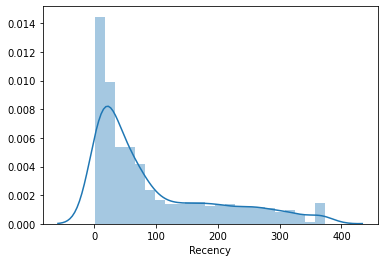

In [47]:
sns.distplot(datamart['Recency'])
plt.show()

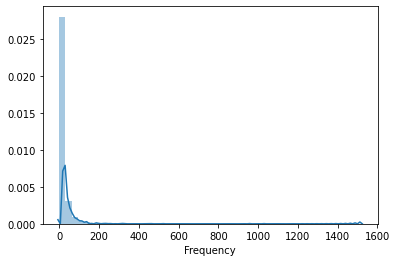

In [48]:
sns.distplot(datamart['Frequency'])
plt.show()

### Data Transformation to manage Skewness

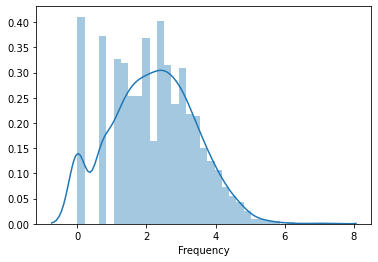

In [49]:
frequency_log=np.log(datamart['Frequency'])
sns.distplot(frequency_log)
plt.show()

### Identifying an issue
The first thing to do is diagnostics, to identify if there is actually an issue. We will analyze key statistics of the dataset and compare the mean and standard deviation of each variable. 
We will also use the describe() function on our RFM datamart. 
There we go - we can immediately see that each of our 
three variables has both a different average value and a different standard deviation. 
In the next step, we will deal with centering the data to make the average values match.

In [50]:
datamart.describe()

,Recency,Frequency,MonetaryValue,RFM_Score
count,3698.000000,3698.000000,3698.000000,3698.000000
mean,94.164684,18.982153,378.754000,5.985938
std,99.808479,44.253416,1472.703511,2.014236
min,1.000000,1.000000,1.000000,3.000000
25%,19.000000,4.000000,59.220000,4.000000
50%,52.000000,9.000000,138.910000,6.000000
75%,150.000000,21.000000,335.290000,8.000000
max,374.000000,1516.000000,59596.070000,9.000000


####  Centering variables with different means
Given that k-means works well on variables with the same mean values, we will have to center them. Centering variables is a simple procedure which is done by calculating an average for each variable and then subtracting it from each observation. In python this is relatively straightforward and we can do it uniformly for all variables at once. We will store our data to datamart_centered, and then review key statistics of it. On a side note - we have rounded the numbers since after subtraction the output of the describe() function will have a scientific expression given that the values have many decimals. As you will see, the average values are now very close to zero for all three variables.

#####Therefore, the sequence of the pre-processing pipelines should be structured in a specific order. First, we have to unskew the data with a log transformation. Only then we standardize the variable to the same average values, and scale them to the same standard deviation. Finally, we store the results as a separate object than the original dataset. This is a critical moment as after we're done with clustering, we will come back to the original values to calculate statistics for each of the clusters based on raw values.

In [51]:
datamart

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
CustomerID,,,,,,,,
12747.0,2,27,992.82,3,3,3,9,Top
12748.0,1,960,7484.05,3,3,3,9,Top
12749.0,4,37,813.45,3,3,3,9,Top
12820.0,3,17,268.02,3,3,3,9,Top
12822.0,71,9,146.15,2,2,2,6,Middle
...,...,...,...,...,...,...,...,...
18280.0,278,2,38.70,1,1,1,3,Low
18281.0,181,2,31.80,1,1,1,3,Low
18282.0,8,2,30.70,3,1,1,5,Middle


In [52]:
datamart_rfm=datamart.drop(columns =['R', 'F','M', 'RFM_Score','RFM_Level']) 

In [53]:
datamart_rfm

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747.0,2,27,992.82
12748.0,1,960,7484.05
12749.0,4,37,813.45
12820.0,3,17,268.02
12822.0,71,9,146.15
...,...,...,...
18280.0,278,2,38.70
18281.0,181,2,31.80
18282.0,8,2,30.70


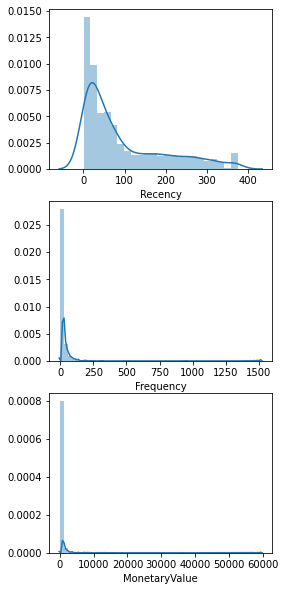

In [74]:
# Plot recency distribution
plt.figure(figsize=(4,10))

plt.subplot(3, 1, 1); sns.distplot(datamart_rfm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_rfm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(datamart_rfm['MonetaryValue'])

# Show the plot
plt.show()

## Unskew the data

In [55]:
# Unskew the data
datamart_log = np.log(datamart_rfm)


## Normalize the data

In [56]:
# Initialize a standard scaler and fit it
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_log)

StandardScaler()

In [57]:
# Scale and center the data
datamart_normalized = scaler.transform(datamart_log)

# Create a pandas DataFrame
datamart_normalized = pd.DataFrame(data=datamart_normalized, index=datamart_rfm.index, columns=datamart_rfm.columns)

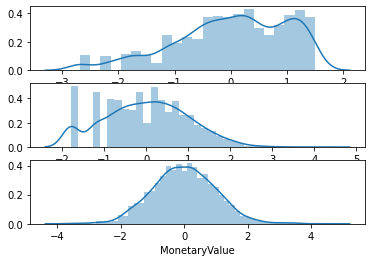

In [58]:
# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(datamart_normalized['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_normalized['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(datamart_normalized['MonetaryValue'])

# Show the plot
plt.show()

In [59]:
datamart_normalized.describe()

,Recency,Frequency,MonetaryValue
count,3.698000e+03,3.698000e+03,3.698000e+03
mean,1.008748e-16,-3.074279e-17,4.188705e-16
std,1.000135e+00,1.000135e+00,1.000135e+00
min,-2.686670e+00,-1.791972e+00,-3.768491e+00
25%,-6.079708e-01,-6.529329e-01,-6.587235e-01
50%,1.028077e-01,1.336218e-02,-9.099377e-03
75%,8.507112e-01,7.095385e-01,6.623188e-01
max,1.495704e+00,4.225602e+00,4.609551e+00


In [60]:
# # Center the data by subtracting average values from each entry
# data_centered = data - data.mean()

# # Scale the data by dividing each entry by standard deviation
# data_scaled = data / data.std()

# # Normalize the data by applying both centering and scaling
# data_normalized = (data - data.mean()) / data.std()

# # Print summary statistics to make sure average is zero and standard deviation is one
# print(data_normalized.describe().round(2))

In [61]:
#Dealing with negative values: Logarithmic is not used!
# Adding a constant before log transormation
#cube root transformation

## Running KMeans

In [62]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,random_state=1)

In [63]:
kmeans.fit(datamart_normalized)

KMeans(n_clusters=4, random_state=1)

In [64]:
cluster_labels=kmeans.labels_

In [65]:
# Create a DataFrame by adding a new cluster label column
datamart_rfm_k3 = datamart_rfm.assign(Cluster=cluster_labels)

# Group the data by cluster
grouped = datamart_rfm_k3.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         129.2      13.0         253.9  1094
1          17.4      55.1        1181.9   821
2         172.1       2.8          46.7  1034
3          19.6      10.5         139.3   749

In [66]:
datamart_rfm_k3

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12747.0,2,27,992.82,1
12748.0,1,960,7484.05,1
12749.0,4,37,813.45,1
12820.0,3,17,268.02,1
12822.0,71,9,146.15,0
...,...,...,...,...
18280.0,278,2,38.70,2
18281.0,181,2,31.80,2
18282.0,8,2,30.70,3


## The Elbow Method

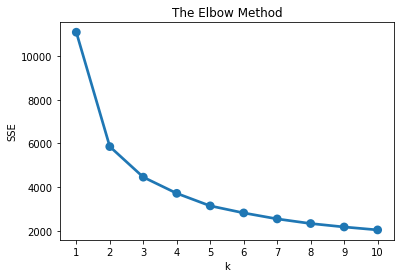

In [67]:
# Fit KMeans and calculate SSE for each k
sse={}
for k in range(1, 11):
  
    # Initialize KMeans with k clusters and fit it 
    kmeans = KMeans(n_clusters=k, random_state=1).fit(datamart_normalized)
    
    # Assign sum of squared distances to k element of the sse dictionary
    sse[k] = kmeans.inertia_ 

# Add the plot title, x and y axis labels
plt.title('The Elbow Method'); plt.xlabel('k'); plt.ylabel('SSE')

# Plot SSE values for each k stored as keys in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [68]:
#The point at 4 is where we identify the largest angle

In [69]:
# Melt the normalized dataset and reset the index
datamart_melt = pd.melt(datamart_rfm_k3.reset_index(), 
                        
# Assign CustomerID and Cluster as ID variables                  
                    id_vars=['CustomerID', 'Cluster'],

# Assign RFM values as value variables
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                        
# Name the variable and value
                    var_name='Metric', value_name='Value')

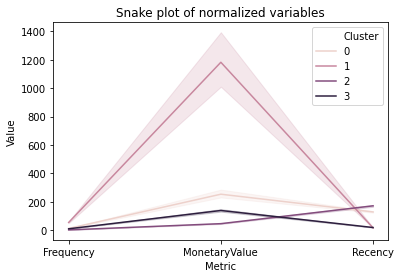

In [70]:
# Add the plot title
plt.title('Snake plot of normalized variables')

# Add the x axis label
plt.xlabel('Metric')

# Add the y axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=datamart_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

In [71]:
# Calculate average RFM values for each cluster
cluster_avg = datamart_rfm_k3.groupby(['Cluster']).mean() 

# Calculate average RFM values for the total customer population
population_avg = datamart_rfm.mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1

# Print relative importance score rounded to 2 decimals
print(relative_imp.round(2))

         Recency  Frequency  MonetaryValue
Cluster                                   
0           0.37      -0.31          -0.33
1          -0.82       1.90           2.12
2           0.83      -0.85          -0.88
3          -0.79      -0.45          -0.63


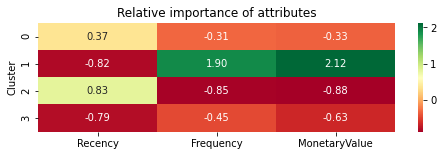

In [72]:
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8, 2))

# Add the plot title
plt.title('Relative importance of attributes')

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

In [73]:
#As a ratio moves away from 0, the more important that attribute is fo for defining cluster compared to population avgimportance for a segment (relative to total population)